<a href="https://colab.research.google.com/github/mo-lanang/Data-Mining-Final-Project/blob/main/Final_Project_Data_Mining_Kelompok_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


FINAL PROJECT DATA MINING

---



Saat ini, media sosial dapat dikatakan sebagai salah satu bagian terpenting dari kehidupan manusia. Sebagai salah satu sarana penyebaran informasi dan berkomunikasi antar individu, banyak sekali manfaat yang dapat diambil dari media sosial. Salah satu kegunaan media sosial adalah sebagai sumber pengambilan data yang dapat digunakan untuk diolah hingga dapat dijadikan pertimbangan dalam pengambilan keputusan di berbagai bidang dengan Social Media Analytics.

Dalam projek final ini, kelompok kami akan menggunakan data yang bersumber dari salah satu platform media sosial, yaitu Twitter. Data twitter yang akan kami gunakan memiliki topik seputar pergelaran Piala Dunia 2022 di Qatar. Data tweet yang diambil hanya berkisar di antara tanggal 20 Desember 2022 hingga 25 Desember 2022. Kami ingin melakukan analisis terhadap sampel data tweet masyarakat Indonesia setelah pergelaran Piala Dunia 2022 di Qatar berakhir dengan menggunakan beberapa metode. Diharapkan hasil analisis ini dapat memberikan insight/informasi yang berguna bagi perseorangan, pelaku bisnis tertentu, ataupun pemangku kepentingan lainnya yang bersangkutan dengan topik yang diangkat dalam projek ini.

Keywords:
1. Piala Dunia Qatar 2022
2. Scraping twitter
3. Cleaning data
4. EDA
5. Preprocessing data
6. Social Network Analysis
7. Centrality Analysis
8. Community Detection
9. Sentiment Analysis
10. K Nearest Neighbor
11. Decision Tree
12. Random Forest

Pertama-tama dilakukan import library yang akan digunakan dalam keseluruhan proses pengolahan data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Run kode ini di awal untuk mengimport semua library yang telah diinstall sebelumnya

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [ ]:
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import twint
import nest_asyncio
import urllib
import json
import networkx as nx
from spacy.lang.id import Indonesian
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from scipy.sparse import csr_matrix
nltk.download('punkt')
nltk.download('vader_lexicon')

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Scrape Data dari Twitter

Selanjutnya, akan dilakukan proses scraping data dari media sosial Twitter yang berkaitan dengan isu piala dunia 2022. Scraping data sendiri merupakan proses otomatis untuk mendapatkan data dari suatu website atau platform dengan menggunakan suatu program atau code. Karena data yang ingin diperoleh kurang lebih sebanyak 11000 sampel data tweet, maka akan diterapkan limit dari data sebanyak 11000.

In [ ]:
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True

In [ ]:
### Scrape data twitter dengan menggunakan library "twint"

config.Search = "piala dunia"
config.Limit = 11000
#config.Since = '2022-12-01'

twint.run.Search(config)
init_data = twint.storage.panda.Tweets_df
print(init_data.shape)

init_data.sample(6)

(11010, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
3026,1606653305392095232,1606653305392095232,1.671891e+12,2022-12-24 14:09:32,+0000,,Draw golin di menit akhir ibarat portugal jual...,in,[saemin],[],...,,,,,,[],,,,
3553,1606526207033757696,1606526207033757696,1.671861e+12,2022-12-24 05:44:30,+0000,,Pagi Sabtu hari ini saya telah meluangkan masa...,in,"[ry, demipayarumput]",[],...,,,,,,[],,,,
9823,1605248031699349504,1604977235475148800,1.671556e+12,2022-12-20 17:05:29,+0000,,@ChelseafanIndo Hanya ketika kegagalan Argenti...,in,[],[],...,,,,,,"[{'screen_name': 'ChelseafanIndo', 'name': '#P...",,,,
6672,1605805645311377409,1605805645311377409,1.671689e+12,2022-12-22 06:01:14,+0000,,"Susunan Pemain Terbaik Piala Dunia 2022, Ada H...",in,"[worldcup, harrymaguire, cristianoronaldo]",[],...,,,,,,[],,,,
6517,1605828501701300224,1605828501701300224,1.671694e+12,2022-12-22 07:32:04,+0000,,Prancis Pernah Ledek Messi di Piala Dunia 2018...,in,[],[],...,,,,,,[],,,,
10535,1605178274455310336,1605176348431249409,1.671539e+12,2022-12-20 12:28:18,+0000,,@idextratime Messi hanya tidur dengan piala du...,in,[],[],...,,,,,,"[{'screen_name': 'idextratime', 'name': 'Extra...",,,,


# Cleaning Data Awal

Setelah dilakukan scraping data, data kemudian dibersihkan agar siap diolah. Proses cleaning data meliputi penghapusan data duplikat dan filtering bahasa pada tweet yang digunakan.

In [ ]:
### Melihat secara sekilas ringkasan dataframe

init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11010 entries, 0 to 11009
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11010 non-null  object 
 1   conversation_id  11010 non-null  object 
 2   created_at       11010 non-null  float64
 3   date             11010 non-null  object 
 4   timezone         11010 non-null  object 
 5   place            11010 non-null  object 
 6   tweet            11010 non-null  object 
 7   language         11010 non-null  object 
 8   hashtags         11010 non-null  object 
 9   cashtags         11010 non-null  object 
 10  user_id          11010 non-null  int64  
 11  user_id_str      11010 non-null  object 
 12  username         11010 non-null  object 
 13  name             11010 non-null  object 
 14  day              11010 non-null  int64  
 15  hour             11010 non-null  object 
 16  link             11010 non-null  object 
 17  urls        

In [ ]:
### Membuang data yang berduplikat pada kolom "username" dan "tweet"

init_data.drop_duplicates(subset=['username', 'tweet'], inplace=True)

print('Jumlah baris dan kolom data sekarang: ', init_data.shape)

Jumlah baris dan kolom data sekarang:  (10440, 38)


In [ ]:
### Melakukan filter hanya untuk tweet yang berbahasa Indonesia

init_data = init_data.query('language == "in"')

print('Jumlah baris dan kolom data sekarang: ', init_data.shape)

Jumlah baris dan kolom data sekarang:  (10264, 38)


In [ ]:
### Import menjadi file excel atau csv

init_data.to_excel('data tweet pildun 20-25 Desember 2022.xlsx', index=False)
init_data.to_csv('data tweet pildun 20-25 Desember 2022.csv', index=False)

# Import Data Kembali ke Google Colab dan Cleaning Lanjutan

Setelah dilakukan proses cleaning data dan data telah disimpan dalam bentuk file excel atau csv, data diupload ke dalam github kemudian data diimport kembali menggunakan link github terkait.

In [ ]:
### Import kembali data ke Google Colab

df = pd.read_csv('https://raw.githubusercontent.com/mo-lanang/Sumber_Data_Final_Project_Data_Mining/main/data%20tweet%20pildun%2020-25%20Desember%202022.csv')
#df = pd.read_excel('isi dengan link dari sini, https://github.com/mo-lanang/Sumber_Data_Final_Project_Data_Mining')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10433 non-null  object 
 1   conversation_id  10433 non-null  object 
 2   created_at       10433 non-null  object 
 3   date             10433 non-null  object 
 4   timezone         10433 non-null  int64  
 5   place            6 non-null      object 
 6   tweet            10433 non-null  object 
 7   language         10432 non-null  object 
 8   hashtags         10432 non-null  object 
 9   cashtags         10432 non-null  object 
 10  user_id          10432 non-null  object 
 11  user_id_str      10432 non-null  object 
 12  username         10432 non-null  object 
 13  name             10431 non-null  object 
 14  day              10431 non-null  float64
 15  hour             10432 non-null  object 
 16  link             10432 non-null  object 
 17  urls        

Selanjutnya, akan dilakukan proses cleaning data kembali. Proses cleaning data kali ini meliputi penanganan terhadap missing values dan penyesuaian tipe data untuk variabel yang terdapat pada dataset.

In [ ]:
### Menghitung persentase missing values pada setiap kolom

percent_miss = round((df.isnull().sum() / len(df)) * 100, 2)

print(percent_miss.sort_values(ascending=False))

trans_dest         100.00
retweet_id         100.00
geo                100.00
source             100.00
user_rt            100.00
user_rt_id         100.00
retweet_date       100.00
translate          100.00
trans_src          100.00
near                99.99
place               99.94
quote_url           95.31
thumbnail           80.79
reply_to             0.02
search               0.02
nretweets            0.02
nreplies             0.02
nlikes               0.02
retweet              0.02
video                0.02
day                  0.02
name                 0.02
user_id              0.01
urls                 0.01
link                 0.01
hour                 0.01
username             0.01
user_id_str          0.01
photos               0.01
cashtags             0.01
hashtags             0.01
language             0.01
date                 0.00
created_at           0.00
conversation_id      0.00
timezone             0.00
tweet                0.00
id                   0.00
dtype: float

Menurut pendapat kami, kolom/variabel yang mempunyai jumlah missing values di atas 80% tidak mengandung banyak informasi yang dapat digali. Oleh karena itu, kami memutuskan untuk membuang kolom/variabel dengan jumlah missing values di atas 80%.

In [ ]:
### Membuang kolom yang memiliki persentasi missing values > 80%

miss_cols = percent_miss[percent_miss > 80].index

df.drop(columns=miss_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10433 non-null  object 
 1   conversation_id  10433 non-null  object 
 2   created_at       10433 non-null  object 
 3   date             10433 non-null  object 
 4   timezone         10433 non-null  int64  
 5   tweet            10433 non-null  object 
 6   language         10432 non-null  object 
 7   hashtags         10432 non-null  object 
 8   cashtags         10432 non-null  object 
 9   user_id          10432 non-null  object 
 10  user_id_str      10432 non-null  object 
 11  username         10432 non-null  object 
 12  name             10431 non-null  object 
 13  day              10431 non-null  float64
 14  hour             10432 non-null  object 
 15  link             10432 non-null  object 
 16  urls             10432 non-null  object 
 17  photos      

In [ ]:
### Membuang baris yang memiliki missing values pada minimal satu kolomnya

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10430 entries, 0 to 10432
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10430 non-null  object 
 1   conversation_id  10430 non-null  object 
 2   created_at       10430 non-null  object 
 3   date             10430 non-null  object 
 4   timezone         10430 non-null  int64  
 5   tweet            10430 non-null  object 
 6   language         10430 non-null  object 
 7   hashtags         10430 non-null  object 
 8   cashtags         10430 non-null  object 
 9   user_id          10430 non-null  object 
 10  user_id_str      10430 non-null  object 
 11  username         10430 non-null  object 
 12  name             10430 non-null  object 
 13  day              10430 non-null  float64
 14  hour             10430 non-null  object 
 15  link             10430 non-null  object 
 16  urls             10430 non-null  object 
 17  photos      

In [ ]:
### Mengganti tipe data dari beberapa kolom

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['hour'].astype('int64')

# Preprocessing untuk Sentimen Analisis

Selanjutnya, akan dilakukan Sentimen Analisis. Sebelum melakukan Sentimen Analisis, dilakukan preprocessing data terlebih dahulu dengan membersihkan data-data tweet yang masih kotor. Proses pembersihan data meliputi penghapusan simbol (namun tidak menghapus underscore), penghapusan link, penghapusan mention pada suatu tweet, lemmatization atau pengubahan suatu kata menjadi kata dasar berdasarkan konteks dari kata tersebut, tokenisasi atau pemenggalan kalimat menjadi kata-kata, dan penggantian kata-kata slang menjadi kata baku.

In [ ]:
### Melakukan import list stop words bahasa indonesia dengan library "Sastrawi"

Sastrawi_StopWords_id = factory.get_stop_words()

print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

126


In [ ]:
### Melakukan import list kata-kata slang yang bersumber dari github dan juga menambahkan beberapa kata-kata slang lainnya

slang = urllib.request.urlopen('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt')
slang = json.loads(slang.read())

len(slang)

1018

In [ ]:
### Membuat fungsi untuk membersihkan data tweet yang masih kotor

def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip())) # Encode data tweet
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Menghilangkan links
    docx = re.sub(r'[^\w]', ' ', docx) # Menghilangkan simbol,  tidak menghilangkan underscore
    #docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering (tidak digunakan untuk sentimen analisis)
    docx = stemmer.stem(docx) # Lemmatize
    docx = TextBlob(docx).words # Tokenisasi

    for i, t in enumerate(docx): # Memproses kata slang
      if t in slang.keys():
        docx[i] = slang[t]
    docx = ' '.join(docx)

    return docx

In [ ]:
### Mengaplikasikan fungsi "cleanText" ke data tweet yang masih kotor

df['cleaned_tweet'] = df['tweet'].apply(cleanText)

In [ ]:
  ### Preview data tweet yang telah dibersihkan

df[['tweet', 'cleaned_tweet']].sample(10)

,tweet,cleaned_tweet
901,Aksi koki selebritas Salt Bae yang memegang da...,aksi koki selebritas salt bae yang pegang dan ...
10347,FIFA siapkan Piala Dunia terakbar dengan 48 ne...,fifa siap piala dunia akbar dengan 48 negara s...
7064,@ChelseafanIndo Hanya ketika kegagalan Argenti...,chelseafanindo hanya ketika gagal argentina di...
4542,"Bocoran dari Legenda, Messi Bakal Tampil di Pi...",bocor dari legenda messi bakal tampil di piala...
10414,Emiliano Martinez mengungkap alasan terkait se...,emiliano martinez ungkap alas kait selebrasi u...
9358,@senogp @MoooiPustaka Leo Messi bisa angkat pi...,senogp moooipustaka leo messi bisa angkat pial...
1526,@AlionelMessi_ Renovasi anggaran besar tapi ha...,alionelmessi renovasi anggar besar tapi hasil ...
3581,"VITTORIO POZZO (Italia), adalah satu-satunya p...",vittorio pozzo italia adalah satu satu latih y...
7263,SISA-SISA SETERU FINAL PIALA DUNIA 2022 https...,sisa sisa seteru final piala dunia 2022
10390,Pertama kali ngikutin piala dunia yang bener-b...,pertama kali ngikutin piala dunia yang benar b...


In [ ]:
### Menyimpan data tweet yang telah dibersihkan ke dalam file ".txt"

df[['cleaned_tweet']].to_csv("cleaned_tweet.txt", index=False, encoding='utf8', header=False)

# EDA

Untuk tahapan selanjutnya, akan dilakukan Exploratory Data Analysis (EDA) untuk melihat informasi secara umum mengenai data yang digunakan.

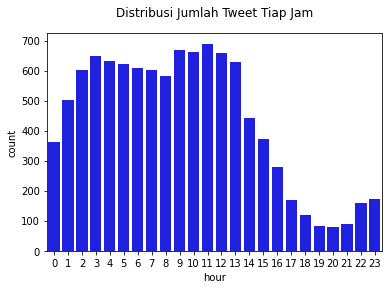

In [ ]:
### Jumlah tweet setiap jamnya

df_hour = df['hour'].value_counts().sort_index()

ax = sns.barplot(x=df_hour.index, y=df_hour, color='blue')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Distribusi Jumlah Tweet Tiap Jam', y=1.05)

plt.show()

Plot di atas menunjukkan jumlah *tweet* yang terjadi selama tanggal 20 Desember 2022 hingga 25 Desember 2022 mengenai topik Piala Dunia Qatar 2022. Dari plot di atas dapat terlihat bahwa mayoritas dari user banyak membuat *tweet* tentang Piala Dunia Qatar 2022 pada waktu pagi hingga siang hari, yaitu dimulai antara pukul 02.00 sampai pukul 13.00. Kemudian jumlah tweet menurun drastis pada waktu sore hingga malam hari, yaitu dimulai antara pukul 14.00 sampai dengan pukul 00.00. Hal tersebut bisa saja disebabkan karena pergelaran Piala Dunia Qatar 2022 yang telah usai pada tanggal 18 Desember 2022, yang mana biasanya laga piala dunia mulai dimainkan pada pukul 22.00 dan karena pergelaran piala dunia telah usai maka jumlah user yang membuat *tweet* pada jam tersebut menurun.

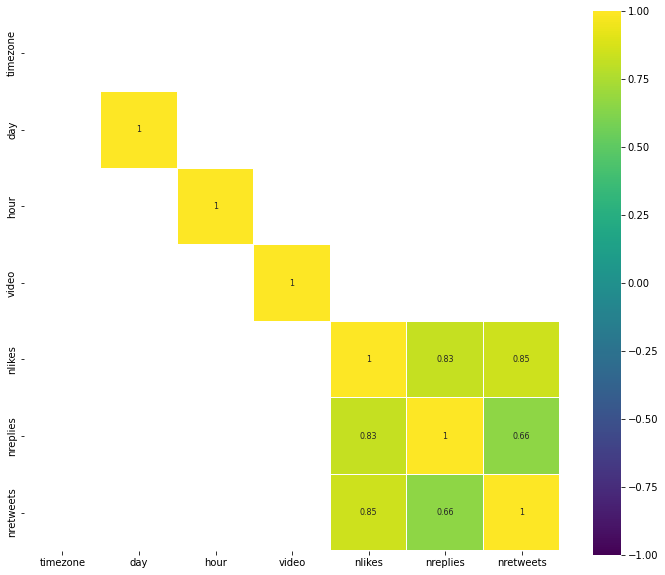

In [ ]:
#Plot korelasi dari data
cor = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square = True);

Pada grafik heatmap korelasi diatas, dapat disimpulkan bahwa:

Terdapat korelasi positif linear yang kuat antara jumlah likes dan jumlah retweets sebesar r=0.85

Terdapat korelasi positif linear yang kuat antara jumlah likes dan jumlah replies sebesar r=0.83

Terdapat korelasi positif linear sedang antara jumlah replies dan jumlah retweets sebesar r=0.66

# Visualisasi Text

Akan dilakukan visualisasi text dari data tweet yang telah dibersihkan menggunakan aplikasi Voyant.

### WordClouds

![picture](https://drive.google.com/uc?export=view&id=1Qeg4N0gDT9BUujUg6NNHDc7WbKjiAnD7)

Pada WordClouds diatas, terlihat bahwa kata Piala dan Dunia adalah kata yang memiliki ukuran paling dominan diantara kata lainnya, ini berarti kata Piala dan Dunia adalah kata yang paling banyak muncul pada lingkup topik yang kami angkat, yakni Piala Dunia 2022. Selain itu, terdapat kata Argentina dan Messi yang juga terlihat memiliki ukuran teks lebih besar dibanding yang lainnya.

Dari data tweet yang digunakan, kata Messi cenderung terdapat pada tweet yang membahas tentang pemain terbaik selama ajang Piala Dunia Qatar 2022 digelar. Sedangkan, kata Argentina cenderung banyak terdapat pada tweet yang membahas tentang partai final karena Argentina merupakan salah satu negara yang berhasil masuk ke babak final bersama Perancis.

Keberhasilan Argentina meraih gelar juara juga menjadi salah satu ruang lingkup mengapa kata Argentina dan juga Messi, sebagai kapten tim negara tersebut, menjadi kata yang banyak disebut pada data yang kami gunakan.

### Links

![picture](https://drive.google.com/uc?export=view&id=1SX1DlVBDrvaQy2KU3TvvB3iFPUooW139)

Pada Links diatas, terdapat dua warna pada visualisasi grafiknya, yakni biru dan orange. Dimana warna biru menandakan kata-kata yang lebih banyak muncul, sedangkan warna orange menandakan kata-kata pendukungnya. Pada hasil visualisasi Links dari data yang kami gunakan, terdapat kata Piala, Dunia, Qatar, 2022, dan Menang yang memiliki warna biru. Sedangkan, kata Argentina, Messi, Juara, dan Final memilki warna orange. Kata Piala dan Dunia juga menjadi dua kata paling dominan pada Links diatas.

Selain itu, jika satu kata terhubung ke kata lain dengan garis pada Links diatas, maka hal itu menandakan bahwa dua kata tersebut sering terdapat pada satu kalimat yang sama. Contohnya, pada gambar terlihat bahwa kata Piala dan Dunia terhubung oleh suatu garis yang menandakan kedua kata ini sering muncul pada satu kalimat yang sama. Kata Piala dan Dunia juga cenderung terhubung ke seluruh kata pendukung pada Links di atas yang umumnya membahas tentang gelar juara Piala Dunia 2022, yakni Argentina sebagai negara pemenang, Messi sebagai kapten dari kesebelasan Argentina, serta kata Juara itu sendiri.

# Social Network Analysis

*Social Network Analysis* adalah suatu metode untuk memvisualisasikan aktivitas dan kekuatan koneksi antar pengguna di jejaring sosial, serta sebagai langkah untuk mengidentifikasi interaksi dalam berbagi pengetahuan. Social network analisis ini juga dapat melakukan pemetaan dan pengukuran hubungan di antara orang-orang, kelompok, organisasi, komputer atau badan informasi/pengetahuan serta pengolahan lainnya yang berada dalam jaringan.

*Social Network Analysis* (SNA) juga dapat dideskripsikan sebagai suatu ilmu yang mempelajari hubungan manusia dengan bantuan teori graf. SNA mempelajari struktur hubungan yang mengaitkan individu atau unit sosial lain dan ketergantungan dalam perilaku atau sikap yang berhubungan dengan susunan hubungan sosial.

Hubungan tersebut digambarkan dengan nodes, atau bisa disebut vertices yang melambangkan aktor atau user dan ties atau disebut juga edges, links atau connections yang melambangkan hubungan antar aktor.

Pada bagian ini kami akan melakukan teknik *Social Network Analysis* (SNA) dengan menggunakan username twitter sebagai nodes atau vertices dan mention sebagai edges. Berikut adalah tahapan pengerjaan yang akan kami lakukan.

## Mengidentifikasi Nodes serta Edges dengan Menggunakan Python

Pada bagian ini akan dilakukan proses pembentukan nodes (username twitter) serta edges (mention) dengan menggunakan bantuan Python.

In [ ]:
### Membuat dataframe baru yang hanya berisi kolom "username" & "tweet"

df_mention = df[['username', 'tweet']]
df_mention.rename({'username': 'user'}, axis=1, inplace=True)
df_mention.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,user,tweet
0,mulyadi_ipul,@CNNIndonesia Pekerjaan bodoh dan GK masuk aka...
1,AnakBai36994926,@amazoght @idextratime Bukan hanya dari piala ...
2,ArdanNews,"Jadwal Liga Spanyol usai Piala Dunia 2022, Mis..."
3,ArdanNews,Prediksi Skor Brentford vs Tottenham Hotspurs ...
4,bukanwarini,"Lawan @xel_ad, di piala dunia kalah sih kemari..."


In [ ]:
### Menjadikan data "user" & "tweet" ke dalam bentuk list

user = df_mention['user'].to_list()
tweet = df_mention['tweet'].to_list()

In [ ]:
### Membuat graf kosong & menambahkan user-user yang ada menjadi nodes/vertex

graf = nx.Graph()
graf.add_nodes_from(user)

print('Banyak nodes = ', graf.number_of_nodes())
print('Banyak edges = ', graf.number_of_edges())

Banyak nodes =  5454
Banyak edges =  0


In [ ]:
### Menggunakan for loop untuk menemukan siapa saja user yang dimention oleh user lain

for u, t in zip(user, tweet):
    mentions =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentions:
        if "." not in mention: #skip email
            graf.add_edge(u, mention)

print('Banyak vertex = ', graf.number_of_nodes())
print('Banyak Edges = ', graf.number_of_edges())

Banyak vertex =  7177
Banyak Edges =  4584


In [ ]:
### Save hasilnya menjadi file Gephi

nx.write_gexf(graf, "pildun_20-25 Desember_2022.gexf")

Tipe graf yang dihasilkan oleh Python dengan menggunakan bantuan library NetworkX ini adalah undirected dimana hubungan atau koneksi antara satu node ke node lain tidak satu arah tetapi dua arah.

## Membuat Graf SNA dengan Menggunakan Gephi

Pada bagian ini akan dilakukan proses pembentukan graf dengan menggunakan nodes berupa username twitter serta edges berupa mention yang telah dibuat pada bagian sebelumnya. Berikut adalah step pengerjaannya.

Pertama-tama file ".gexf" yang telah dihasilkan pada bagian sebelumnya akan diimport ke dalam gephi sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=11-0PKbZ7bbcl0R-1brFuLcWncMa63eup)

Kemudian pada bagian "Statistics" akan dirun "Modularity Report" untuk mendapatkan skor serta hasil modularitynya sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1Nh6bJbNE9mfsm_pxEJENNTFm6QF0PnWI)

Dari hasil modularity report di atas, didapatkan nilai modularity sebesar 0.877. Nilai ini mengindikasikan bahwa pada network yang akan dibentuk nantinya terdapat kecenderungan yang kuat setiap node untuk membentuk suatu kluster atau kelompok.

Selanjutnya kembali pada bagian "Statistics" akan dirun "Network Diameter Report" untuk mendapatkan beberapa skor seperti Betweenness Centrality dan  Closeness Centrality sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1NSzaZqvz2HaCWiZ6rj5_6HcIZc7UtbHd)

Kemudian akan dipilih layout untuk membentuk network grafnya. Pertama kami menerapkan layout bernama Force Atlas 2 sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1mYuK1ChC56cphVwUN-8cWJVcZKOPj-TT)

Selanjutnya kami menerapkan layout bernama Yifan Hu Proportional sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1rTzUPA3mfW1GCc1BXTUNqV8K4jzpnz_O)

Kemudian warna dari setiap nodes akan dipartisi berdasarkan hasil modularitynya sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1_5iowFjBsX2jupN_AvM8qn9Imgt4TuDX)

Selanjutnya ukuran dari setiap nodes akan dipartisi berdasarkan degree centralitynya sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1yWWGFDEH7u2VZ4PXWUEWF0_zJIELaMyh)

Selanjutnya ukuran dari teks untuk setiap nodes pun akan dipartisi berdasarkan degree centralitynya sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1FlRgNuT6I4E-DMGm7lgQNsXUM22O16PD)

Kemudian hasil dari graf network degree centrality yang telah dilakukan pada step-step di atas akan disave sebagai file ".png".

Selanjutnya ukuran dari setiap nodes serta ukuran teks dari setiap nodes akan dipartisi berdasarkan eigenvector centralitynya sebagai berikut.

![picture](https://drive.google.com/uc?export=view&id=1yUw6udc-scxwD1Lwm-4xbJCvli_lsu4W)

![picture](https://drive.google.com/uc?export=view&id=1-_kLRF3Hy6WXDMnNAuKqHoTDbdQsS1Gy)

Kemudian hasil dari graf network eigenvector centrality yang telah dilakukan pada step-step di atas akan disave sebagai file ".png".

> Berikut adalah hasil graf network dengan menggunakan **degree centrality**.



![picture](https://drive.google.com/uc?export=view&id=1j88_hQg0PgPDSqAOwV3vU9vxFT3S415e)



> Berikut adalah hasil graf network dengan menggunakan **eigenvector centrality**.



![picture](https://drive.google.com/uc?export=view&id=1OpO-GlNCZzn9gtOs86gJUR6vQUmZlm_w)

## Insight atau Informasi yang Dapat Diambil

### Dari Segi *Centrality Analysis*

*Centrality Analysis* yang kami gunakan pada graf network kami adalah degree centrality dan eigenvector centrality. Degree centrality adalah centrality yang menunjukkan jumlah koneksi atau interaksi secara langsung (direct) yang dimiliki suatu node atau vertices. Semakin besar nilai centrality ini, maka menunjukkan semakin banyak pula koneksi atau interaksi langsung yang dimiliki sautu node atau vertices terhadap node lain sehingga jumlah node yang dapat digapai secara langsung akan semakin banyak. Nilai centrality ini dapat digunakan untuk menentukan node mana yang memiliki pengaruh terbesar dalam suatu jaringan/network. Sedangkan eigenvector centrality adalah centrality yang menunjukkan seberapa banyak koneksi atau interaksi secara langsung yang dimiliki suatu node terhadap node lain yang juga memiliki konektivitas yang tinggi. Nilai centrality ini dapat digunakan untuk menentukan node mana yang mempunyai koneksi terbanyak dengan node lain yang juga *well-connected*.

Berdasarkan graf network degree centrality di atas, dapat terlihat bahwa user "idextratime" mempunyai nilai degree centrality yang sangat tinggi dalam network dan diikuti dengan user "SiaranBolaLive". Terdapat indikasi bahwa user "idextratime" mempunyai frekuensi yang tinggi dalam melakukan mention secara langsung terhadap user lain ataupun bisa saja terdapat banyak user yang melakukan mention secara langsung terhadap "idextratime" dalam tweet mereka. Hal ini juga dapat menjadi indikasi bahwa user "idextratime" merupakan user yang paling berpengaruh dalam topik seputar Piala Dunia 2022 di Qatar dalam tempo waktu 20 Desember 2022 hingga 25 Desember 2022 di twitter berdasarkan mention.

Kemudian berdasarkan graf network eigenvector centrality di atas, dapat terlihat kembali bahwa user "idextratime" mempunyai nilai eigenvector centrality yang sangat tinggi. Hal ini dapat menjadi indikasi bahwa user "idextratime" sering melakukan mention terhadap user lain yang juga sering melakukan mention terhadap user-user lainnya dalam topik seputar Piala Dunia 2022 di Qatar dalam tempo waktu 20 Desember 2022 hingga 25 Desember 2022 di twitter.

Berdasarkan beberapa penjelasan di atas, berikut adalah beberapa insight/informasi yang dapat kami berikan:

1. Karena user "idextratime" mempunyai nilai degree centrality serta eigenvector centrality yang tinggi yang mengindikasikan user tersebut sering melakukan mention terhadap user lain atau dimention, maka bisa saja user "idextratime" mempunyai kemampuan yang tinggi dalam mempengaruhi user-user lain untuk berinteraksi dengannya. Hal ini bisa saja disebabkan karena kemampuan user "idextratime" untuk membuat berbagai macam jenis tweet yang menarik serta mudah untuk diterima user-user lain seputar Piala Dunia 2022 di Qatar.
2. Kemampuan di atas dapat dimanfaatkan oleh user "idextratime" itu sendiri, misalnya untuk menjual berbagai jenis merchandise yang berhubungan dengan Piala Dunia Qatar 2022 seperti jersey bola, sepatu bola, dan lain-lain. User "idextratime" juga dapat memanfaatkan kemampuan ini untuk membuka jasa iklan dalam laman akun twitternya yang masih memiliki hubungan erat dengan topik Piala Dunia Qatar 2022. User-user lain pun dapat menjalin kolaborasi dengan user "idextratime" untuk misalnya memasarkan barang/bisnis yang mereka punya.

### Dari Segi *Community Detection*

*Community Detection* adalah suatu teknik yang dapat digunakan untuk menemukan sebuah komunitas pada network dengan melakukan pemisahan. Dalam graf network di atas, baik graf untuk degree centrality maupun eigenvector centrality, dapat terlihat terdapat tujuh kluster/komunitas utama. Ketujuh kluster/komunitas tersebut adalah kluster/komunitas dengan warna pink, hijau muda, hitam, oranye, merah, biru muda, dan hijau tua. Kemudian untuk melihat topik tweet apa yang mewakili masing-masing komunitas tersebut akan dilihat dari tweet atau mention user yang mempunyai degree centrality tertinggi dari masing-masing komunitas. Berikut adalah user dengan degree centrality tertinggi untuk masing-masing komunitas:

1. Komunitas pink: "idextratime"
2. Komunitas hijau muda: "SiaranBolaLive"
3. Komunitas hitam: "FaktaSepakbola"
4. Komunitas oranye: "GOAL"
5. Komunitas merah: "PSSI"
6. Komunitas biru muda: "registaco"
7. Komunitas hijau tua: "indosat"

Kemudian berikut adalah beberapa tweet dari user-user di atas.

In [ ]:
### Komunitas pink

display(df[df['username'].str.contains('idextratime')].loc[:, ['tweet']])

,tweet
1473,Weekend ini tanpa Piala Dunia dan 5 liga top E...
1777,Sebuah petisi online yang ditujukan kepada FIF...
1867,RESMI : Goal sepeda Richarlison ke gawang Serb...
1869,RESMI : Andre Onana (26) mengumumkan pensiun d...
3401,"Ahmed Al Barwani, (mantan anggota dewan penase..."
3828,🚨 BREAKING: Cristiano Ronaldo telah mencapai k...
4380,"Hanya Pele, Lionel Messi, dan Ronaldo Nazario ..."
5076,"Daily reminder, Lionel Messi adalah juara Pia..."
5124,Kangen Piala Dunia
5208,🚨 BREAKING: Di antara banyak klub yang bermina...


In [ ]:
### Komunitas hijau muda

display(df[df['username'].str.contains('SiaranBolaLive')].loc[:, ['tweet']])

,tweet
186,#FIFAWorldCupQatar2022 👍✊ Thanks Qatar 🇶🇦 PIAL...
1153,"Pep Guardiola:""Kalvin Phillips overweight sete..."
2930,FIFA sedang melakukan investigasi lantaran Sal...


In [ ]:
### Komunitas hitam

display(df[df['username'].str.contains('FaktaSepakbola')].loc[:, ['tweet']])

,tweet
98,Beberapa Rekor di #FIFAWorldCup yang berhasil ...
1895,"Gol akrobatik Richarlison ke gawang Serbia, be..."
3405,"Kondisi di Qatar kembali normal, sudah tidak s..."
5582,Starting XI laga persahabatan PSG vs Quevilly-...
5598,Baru beberapa hari saja setelah Kylian Mbappe ...
6071,Parade Juara Piala Dunia 2022 Timnas Argentina...
6656,Emiliano Martinez terlihat memegang sebuah bon...
6879,Sambutan Masyarakat untuk Timnas Maroko hari i...
7190,"Panas terik saat parade trofi Piala Dunia, bia..."
8043,Malam pertama Lionel Messi dengan trofi Piala ...


In [ ]:
### Komunitas oranye

display(df[df['username'].str.contains('GOAL')].loc[:, ['tweet']])

,tweet
26,Drama Baru Karim Benzema: Unfollow mayoritas ...
287,"🗣️ ""Terima kasih telah memberikan saya Piala D..."
464,Tak terasa sudah tujuh hari berlalu sejak kita...
568,"💬 ""Kami melawan tim terbaik di dunia, saya bis..."
700,Seorang fans Argentina meluncurkan petisi onli...
...,...
8625,Penampilan Emiliano Martinez selama Piala Duni...
8693,Lionel Messi pamer keberhasilan dirinya dengan...
9056,Performa Cristiano Ronaldo di Piala Dunia 2022...
9198,✅ Sportivitas tanpa batas ✅ Fans &amp; pemain ...


In [ ]:
### Komunitas merah

display(df[df['tweet'].str.contains('@PSSI')].loc[:, ['tweet']])

,tweet
367,@detiksport @AremafcOfficial @PSSI @premierlea...
961,@akbarfaizal68 @PSSI Indonesia nggak bisa lolo...
984,#GelanggangTanya Jaman ketum Edy Rahmayadi &am...
1188,@PSSI Semakin Optimis Kita bisa masuk piala du...
1493,"@PSSI Efek piala dunia masih terasa, maka nya ..."
1619,"@GIBOLofficial Mungkin ketika hujan lebat,sist..."
1621,@akbarfaizal68 @PSSI Timnas itu q yakin bisa m...
1622,@MuchammadArifS2 @ahmadarief5150 @Persija_Jkt ...
1663,@BroadcastBola @PSSI @Liga1Match @KEMENPORA_RI...
1715,@PSSI Salam hormat terhadap Timnas Garuda dan ...


In [ ]:
### Komunitas biru muda

display(df[df['username'].str.contains('registaco')].loc[:, ['tweet']])

,tweet
748,Tato baru Di Maria adalah trofi Piala Dunia 🥶 ...
3206,"Gak sabar Piala Dunia 2026, deh. Liat Mbappe..."
7332,Apa mimpinya Messi bersama dengan trofi Piala ...


In [ ]:
### Komunitas hijau tua

display(df[df['tweet'].str.contains('@indosat')].loc[:, ['tweet']])

,tweet
5143,Dan Final ini mempertemukan dua bintang terbai...
6241,@idextratime ✅Pencetak gol Prancis pd final Pi...
6249,✅Pencetak gol Prancis pd final Piala Dunia 199...
7150,Pencetak gol Prancis pada final Piala Dunia 19...
7307,Pencetak gol Prancis di final Piala Dunia 1998...
7407,Pencetak Gol Prancis Di Final Piala Dunia 1998...
7434,pencetak gol prancis di final piala dunia 1998...
7450,Pencetak gol Prancis di final Piala Dunia 1998...
7497,Pencetak gol Prancis pada final Piala Dunia 19...
7576,@idextratime Pencetak gol di Piala Dunia tahun...


Dari hasil kode-kode di atas, berikut adalah beberapa insight/informasi yang dapat diambil dari masing-masing komunitas:

1. Komunitas pink berisikan tweet dengan topik seputar berita transfer pemain, berita kejadian-kejadian setelah Piala Dunia Qatar 2022, serta tweet jenaka tentang sepak bola dari user "idextratime".
2. Komunitas hijau muda berisikan tweet dengan topik seputar beberapa kejadian setelah Piala Dunia Qatar 2022 usai.
3. Komunitas hitam berisikan tweet dengan topik seputar beberapa pencapaian pemain setelah Piala Dunia usai serta kemenangan Argentina pada Piala Dunia Qatar 2022.
4. Komunitas oranye berisikan tweet dengan topik yang lebih banyak membahas berita Piala Dunia Qatar 2022 yang jauh lebih lengkap dan bervariasi.
5. Komunitas merah berisikan tweet dengan topik seputar opini user twitter Indonesia terhadap PSSI.
6. Komunitas biru muda berisikan tweet dengan topik seputar opini tentang Mbappe dan Messi.
7. Komunitas hijau tua berisikan tweet dengan topik seputar kuis berhadiah yang diselenggarakan oleh Indosat dan user "idextratime".

# Sentiment Analysis

Analisis sentimen merupakan salah satu bidang dari *Natural Languange Processing* (NLP) yang membangun sistem untuk mengenali dan mengekstraksi opini dalam bentuk teks. Informasi berbentuk teks saat ini banyak terdapat di internet dalam format forum, blog, media sosial, serta situs berisi review. Dengan bantuan analisis sentimen, informasi yang tadinya tidak terstruktur dapat diubah menjadi data yang lebih terstruktur. Metode analisis sentimen kami gunakan dengan tujuan utama untuk mengetahui distribusi sentimen user twitter Indonesia terhadap pergelaran Piala Dunia 2022 Qatar pada rentang waktu 20 Desember 2022 hingga 25 Desember 2022. Teknik analisis sentimen yang kami gunakan adalah sebagai berikut,

1. Menggunakan library textblob serta proses manual untuk menghasilkan sentimen.
2. Menggunakan metode supervised untuk analisis sentimen.

Berikut adalah step pengerjaannya.

## Menggunakan Library textblob serta Proses Manual untuk Mendapatkan Sentimen

Pada bagian ini kami akan menggunakan bantuan dari library "textblob" untuk menghasilkan sentimen dari setiap tweet yang telah dibersihkan serta dipreprocess pada bagian sebelumnya. Tetapi akan ada beberapa tweet yang kami berikan sentimen secara manual karena tidak dapat diproses oleh library "textblob". Berikut adalah tahapan pengerjaannya.

In [ ]:
### Membuat fungsi untuk mencari skor polarity dengan library "textblob"
def Score_Pol_Sub(text):
  blob = TextBlob(text)
  analysis = blob.translate(from_lang='id', to='en')
  return analysis.sentiment

In [ ]:
### Membuat beberapa dataframe awal untuk analisis sentimen
df_sentimen1 = df[['cleaned_tweet']].iloc[:500, [0]]
df_sentimen2 = df[['cleaned_tweet']].iloc[500:1000, [0]]
df_sentimen3 = df[['cleaned_tweet']].iloc[1000:1500, [0]]
df_sentimen4 = df[['cleaned_tweet']].iloc[1500:2000, [0]]
df_sentimen5 = df[['cleaned_tweet']].iloc[2000:2500, [0]]
df_sentimen6 = df[['cleaned_tweet']].iloc[2500:3000, [0]]
df_sentimen7 = df[['cleaned_tweet']].iloc[3000:3510, [0]]
df_sentimen8 = df[['cleaned_tweet']].iloc[3510:3515, [0]]   # dataframe ini yang akan diberikan sentimen secara manual dengan bantuan excel
df_sentimen9 = df[['cleaned_tweet']].iloc[3515:4500, [0]]
df_sentimen10 = df[['cleaned_tweet']].iloc[4500:5000, [0]]
df_sentimen11 = df[['cleaned_tweet']].iloc[5000:5500, [0]]
df_sentimen12 = df[['cleaned_tweet']].iloc[5500:6000, [0]]
df_sentimen13 = df[['cleaned_tweet']].iloc[6000:6500, [0]]
df_sentimen14 = df[['cleaned_tweet']].iloc[6500:7000, [0]]
df_sentimen15 = df[['cleaned_tweet']].iloc[7000:7500, [0]]
df_sentimen16 = df[['cleaned_tweet']].iloc[7500:8000, [0]]
df_sentimen17 = df[['cleaned_tweet']].iloc[8000:8500, [0]]
df_sentimen18 = df[['cleaned_tweet']].iloc[8500:9000, [0]]
df_sentimen19 = df[['cleaned_tweet']].iloc[9000:9500, [0]]
df_sentimen20 = df[['cleaned_tweet']].iloc[9500:10000, [0]]
df_sentimen21 = df[['cleaned_tweet']].iloc[10000:, [0]]

**NOTES:**

Dalam proses penghasilan sentimen dengan menggunakan "textblob", bisa saja terjadi kendala, namun kendala ini belum tentu akan terjadi. Contoh kendalanya misalkan "textblob" masih akan bisa memproses sentimen untuk data tweet dari baris pertama hingga baris ke-3000. Namun mulai baris ke-3001 "textblob" tidak mampu lagi untuk memproses sentimennya karena terdapat limit. Jika kendala ini terjadi, kami akan mengimport dan save data hasil sentimen baris pertama hingga 3000 ke dalam file excel terlebih dahulu. Kemudian kami melakukan restart runtime pada Google Colab ini dan melanjutkan proses penghasilan sentimen dengan menggunakan "textblob" mulai dari baris ke-3001 hingga seterusnya. Selanjutnya data hasil sentimen mulai dari baris ke-3001 tersebut kami import dan save ke dalam file excel untuk kemudian kami gabungkan dengan file excel baris-baris sebelumnya.

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen1['polarity'] = df_sentimen1['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen2['polarity'] = df_sentimen2['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen3['polarity'] = df_sentimen3['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen4['polarity'] = df_sentimen4['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen5['polarity'] = df_sentimen5['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen6['polarity'] = df_sentimen6['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen7['polarity'] = df_sentimen7['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen9['polarity'] = df_sentimen9['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen10['polarity'] = df_sentimen10['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen11['polarity'] = df_sentimen11['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen12['polarity'] = df_sentimen12['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen13['polarity'] = df_sentimen13['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen14['polarity'] = df_sentimen14['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen15['polarity'] = df_sentimen15['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen16['polarity'] = df_sentimen16['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen17['polarity'] = df_sentimen17['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen18['polarity'] = df_sentimen18['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen19['polarity'] = df_sentimen19['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen20['polarity'] = df_sentimen20['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Mencari skor polarity dari setiap tweet yang ada
df_sentimen21['polarity'] = df_sentimen21['cleaned_tweet'].apply(lambda x: Score_Pol_Sub(x)[0])

In [ ]:
### Menggabungkan semua hasil sentimen ke dalam satu dataframe

df_sentimen_all = pd.concat([df_sentimen1, df_sentimen2, df_sentimen3, df_sentimen4, df_sentimen5,
                             df_sentimen6, df_sentimen7, df_sentimen8, df_sentimen9, df_sentimen10,
                             df_sentimen11, df_sentimen12, df_sentimen13, df_sentimen14, df_sentimen15,
                             df_sentimen16, df_sentimen17, df_sentimen18, df_sentimen19, df_sentimen20,
                             df_sentimen21])

In [ ]:
### Export menjadi file excel

df_sentimen_all.to_excel('pildun-sentimen-results.xlsx')

Setelah proses-proses di atas selesai, dengan menggunakan bantuan excel, kami akan mengkategorikan setiap tweet ke dalam tiga kategori. Kategori pertama adalah sentimen positif (1) yang akan diberikan kepada tweet yang mempunyai nilai polarity > 0. Kategori kedua adalah sentimen netral (0) yang akan diberikan kepada tweet yang mempunyai nilai polarity = 0. Kategori ketiga adalah sentimen negatif (-1) yang akan diberikan kepada tweet yang mempunyai nilai polarity < 0. Kemudian hasilnya akan kami save as ".csv" dan kami masukkan ke github untuk nantinya diimport kembali ke dalam Google Colab ini.

## Import Kembali Data Hasil Sentimen ke Google Colab

In [ ]:
df_sa = pd.read_csv('https://raw.githubusercontent.com/mo-lanang/Sumber_Data_Final_Project_Data_Mining/main/pildun-sentimen-results.csv')

print(df_sa.info())
print('\n')
display(df_sa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cleaned_tweet  10430 non-null  object 
 1   polarity       10430 non-null  float64
 2   sentimen       10430 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 244.6+ KB
None




,cleaned_tweet,polarity,sentimen
0,cnnindonesia kerja bodoh dan gk masuk akal ema...,-0.493750,-1
1,amazoght idextratime bukan hanya dari piala du...,-0.016667,-1
2,jadwal liga spanyol usai piala dunia 2022 misi...,0.333333,1
3,prediksi skor brentford vs tottenham hotspurs ...,0.325000,1
4,lawan xel ada di piala dunia kalah sih kemarin...,0.000000,0


## Hasil Analytics untuk Data Hasil Sentimen

Pada bagian ini akan dicari beberapa insight/informasi yang dapat diambil dari data *tweet* yang telah berhasil didapatkan hasil sentimennya.

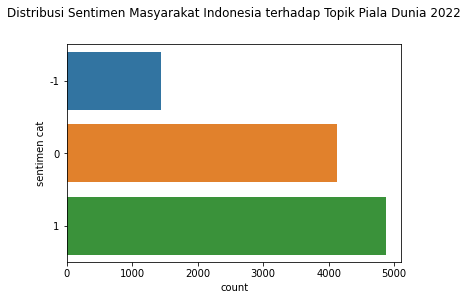

In [ ]:
### Distribusi sentimen tweet masyarakat Indonesia terhadap topik Piala Dunia 2022 di Qatar

fig, ax = plt.subplots()

ax = sns.countplot(y=df_sa['sentimen'])
ax.set_ylabel('sentimen cat')
ax.set_title('Distribusi Sentimen Masyarakat Indonesia terhadap Topik Piala Dunia 2022', y=1.1)

plt.show()

In [ ]:
display(df_sa['sentimen'].value_counts(sort=True).to_frame().rename(columns={'sentimen': 'jumlah'}))

,jumlah
1,4867
0,4124
-1,1439


Dari kedua hasil di atas dapat terlihat bahwa jumlah sentimen positif (1) merupakan yang terbanyak dengan jumlah tweet sebesar 4867. Diikuti dengan sentimen netral (0) sebesar 4124 serta sentimen negatif (-1) sebesar 1439. Hal ini dapat menunjukkan bahwa setelah Piala Dunia 2022 di Qatar usai, mayoritas dari sampel user twitter Indonesia masih menunjukkan antusiasme serta respon yang positif terhadap pergelaran Piala Dunia 2022 di Qatar. Hal ini bisa saja dimanfaatkan oleh seseorang atau pelaku usaha dengan misalnya menjual beberapa merchandise atau barang-barang yang ada kaitannya dengan Piala Dunia 2022 di Qatar melalui media sosial twitter.

### Wordclouds

#### Wordclouds untuk Sentimen Positif (1)

In [ ]:
### Filter data tweet dengan sentimen positif

word_pos = df_sa.query('sentimen == 1').iloc[:, [0]]

word_pos.to_csv("positive_wordclouds.txt", index=False, encoding='utf8', header=False)

![picture](https://drive.google.com/uc?export=view&id=1s4JmX8GQhj1Pv3zatEhU0G94ZVeFh9Z4)

#### Wordclouds untuk Sentimen Netral (0)

In [ ]:
### Filter data tweet dengan sentimen netral

word_neu = df_sa.query('sentimen == 0').iloc[:, [0]]

word_neu.to_csv("neutral_wordclouds.txt", index=False, encoding='utf8', header=False)

![picture](https://drive.google.com/uc?export=view&id=16wuC-VTDsBT5Z1jNrmxbsrARbBxjm56z)

#### Wordclouds untuk Sentimen Negatif (-1)

In [ ]:
### Filter data tweet dengan sentimen negatif

word_neg = df_sa.query('sentimen == -1').iloc[:, [0]]

word_neg.to_csv("negative_wordclouds.txt", index=False, encoding='utf8', header=False)

![picture](https://drive.google.com/uc?export=view&id=1FgRyqFx-nmP8W52UuoHos_bhGv-gScbP)

Berdasarkan WordClouds dari ketiga sentimen di atas, terlihat bahwa setiap sentimen cenderung membicarakan topik yang sama, yaitu seputar keberhasilan Argentina dalam meraih gelar juara Piala Dunia 2022 dimana Messi sebagai kapten tim Argentina juga ikut menjadi salah satu topik pembicaraan yang paling sering menjadi bahan cuitan.

## Metode Supervised untuk Analisis Sentimen

Metode *supervised learning* kami gunakan untuk dapat mencari model yang tidak hanya terbaik (mempunyai akurasi yang tinggi) namun juga model yang paling cocok untuk digunakan dalam memprediksi sentimen masyarakat Indonesia terhadap topik Piala Dunia 2022 di Qatar. Dimana model ini diharapkan dapat membantu suatu jenis bisnis tertentu dalam menentukan sentimen masyarakat Indonesia terhadap topik Piala Dunia Qatar 2022, dengan catatan data yang digunakan mempunyai karakteristik serta demografi yang mirip. Kami akan membandingkan beberapa metode *supervised learning* kemudian menentukan model terbaiknya.

Berikut adalah langkah pengerjaannya.

### Mengatasi Data Imbalance dengan menggunakan Oversampling

Dari hasil sentimen yang telah dilakukan pada bagian sebelumnya, dapat terlihat bahwa variabel yang akan digunakan sebagai labels (yaitu variabel sentimen) mempunyai jumlah yang tidak merata untuk setiap kategori sentimennya. Sentimen positif (1) mempunyai jumlah 4867, sentimen netral (0) mempunyai jumlah 4124, sedangkan sentimen negatif (-1) mempunyai jumlah 1439. Sentimen negatif mempunyai jumlah yang jauh lebih sedikit jika dibandingkan dengan kedua kategori sentimen lainnya. Hal ini dapat menimbulkan isu dimana model machine learning yang akan dibuat nantinya mempunyai kemampuan yang lebih baik dalam memprediksi kelas positif dan netral, namun sebaliknya untuk kelas negatif. Oleh karena hal itu, akan dilakukan over sampling dengan menggunakan fungsi RandomOverSampling() dari library "imblearn" sebagai berikut.

In [ ]:
ros = imblearn.over_sampling.RandomOverSampler(random_state=123)

X_ros, y_ros = ros.fit_resample(df_sa[['cleaned_tweet']], df_sa[['sentimen']])

print('Terdapat', X_ros.shape[0] - df_sa[['cleaned_tweet']].shape[0], 'data baru yang ditambahkan dari hasil over sampling')

Terdapat 4171 data baru yang ditambahkan dari hasil over sampling


### Split Menjadi Data Train & Test

Kami melakukan split data train dan test dengan perbandingan 80% untuk data train dan 20% untuk data test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros,
                                                    test_size=0.2, random_state=123)

X_train = X_train['cleaned_tweet']
y_train = y_train['sentimen']
X_test = X_test['cleaned_tweet']
y_test = y_test['sentimen']

print('Bentuk data train X: ', X_train.shape)
print('Bentuk data train y: ', y_train.shape)
print('Bentuk data test X: ', X_test.shape)
print('Bentuk data test y: ', y_test.shape)

Bentuk data train X:  (11680,)
Bentuk data train y:  (11680,)
Bentuk data test X:  (2921,)
Bentuk data test y:  (2921,)


### Algoritma KNN

#### Preprocess Data Teks dengan Teknik VSM TF-IDF Vectorizer dan Menentukan Parameter yang Optimal


TF-IDF (*Term Frequency* - *Inverse Document Frequency*) adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini akan menghitung nilai *Term Frequency* (TF) dan *Inverse Document Frequency* (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen.

Kemudian untuk penentuan parameter yang optimal akan digunakan HalvingGridSearchCV dari library scikitlearn.

In [ ]:
CV = 5
metric = 'accuracy'
params_knn = {}
params_knn['tfidfvectorizer__min_df'] = [5, 10, 15]
params_knn['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params_knn['tfidfvectorizer__smooth_idf'] = [True]
params_knn['tfidfvectorizer__sublinear_tf'] = [True]
params_knn['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params_knn['kneighborsclassifier__n_neighbors'] = [3, 5, 10]
params_knn['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe_knn = make_pipeline(TfidfVectorizer(), KNeighborsClassifier())
HgridCV_knn = HalvingGridSearchCV(pipe_knn, params_knn, cv=CV, scoring=metric,
                              verbose=1, return_train_score=True, random_state=123)
HgridCV_knn.fit(X_train, y_train)

print('\n')
print('Best score: ', HgridCV_knn.best_score_)
print('Best params: ', HgridCV_knn.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 144
max_resources_: 11680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 144
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 432
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1296
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 3888
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 11664
Fitting 5 folds for each of 2 candidates, totalling 10 fits


Best score:  0.684648370497427
Best params:  {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance', 'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__smooth_idf': True, 'tfi

Setelah menemukan parameter terbaik untuk TF-IDF vectorizer dan algoritma KNN, akan dilakukan preprocessing data teks serta training model KNN dengan menggunakan parameter terbaik yang telah ditemukan di atas sebagai berikut.

In [ ]:
### Preprocess data teks dengan parameter terbaik untuk TF-IDF

vsm_knn = TfidfVectorizer(max_df = 0.95, min_df = 5, ngram_range= (1, 1), smooth_idf=True, sublinear_tf=True)

X_train_knn = vsm_knn.fit_transform(X_train)
X_test_knn = vsm_knn.transform(X_test)

print(X_train_knn.shape, X_test_knn.shape)

(11680, 3764) (2921, 3764)


In [ ]:
### Train model

knn_final = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_final.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

#### Evaluasi Model

Pertama, akan dilakukan penilaian terhadap performa generalisasi model untuk mengecek apakah model yang ada mengalami overfit atau underfit. Akan dilakukan pembandingan nilai rata-rata train score terhadap test score. Bila nilai train score tinggi namun test score rendah maka terdapat indikasi bahwa model mengalami overfit. Bila nilai train score rendah dan nilai test score rendah maka terdapat indikasi model mengalami underfit.

In [ ]:
gen_perf_knn = pd.DataFrame(HgridCV_knn.cv_results_)
gen_perf_knn.query('rank_test_score == 1').loc[:, ['mean_train_score', 'mean_test_score']].drop_duplicates()

,mean_train_score,mean_test_score
240,0.999593,0.684648


Dari hasil di atas dapat terlihat bahwa berdasarkan hasil lima kali cross validasi nilai rata-rata test score mengalami penurunan yang signifikan jika dibandingkan dengan nilai rata-rata train scorenya. Penurunannya adalah sekitar 30%. Hal tersebut dapat menjadi indikasi bahwa model yang telah dibuat bisa saja mengalami overfit.

Kemudian akan dilakukan evaluasi terhadap model dengan menampilkan beberapa metrik evaluasi sebagai berikut.

In [ ]:
### Membuat prediksi dengan menggunakan model yang ada

knn_pred = knn_final.predict(X_test_knn)

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           0       0.54      0.98      0.70       991
           1       0.96      0.17      0.29       954

    accuracy                           0.71      2921
   macro avg       0.83      0.70      0.65      2921
weighted avg       0.82      0.71      0.65      2921



### Algoritma Decision Tree

#### Preprocess Data Teks dengan Teknik VSM TF-IDF Vectorizer dan Menentukan Parameter yang Optimal


TF-IDF (*Term Frequency* - *Inverse Document Frequency*) adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini akan menghitung nilai *Term Frequency* (TF) dan *Inverse Document Frequency* (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen.

Kemudian untuk penentuan parameter yang optimal akan digunakan HalvingGridSearchCV dari library scikitlearn.

In [ ]:
CV = 5
metric = 'accuracy'
params_dt = {}
params_dt['tfidfvectorizer__min_df'] = [5, 10, 30]
params_dt['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params_dt['tfidfvectorizer__smooth_idf'] = [True]
params_dt['tfidfvectorizer__sublinear_tf'] = [True]
params_dt['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params_dt['decisiontreeclassifier__criterion'] = ['gini', 'entropy']
params_dt['decisiontreeclassifier__max_depth'] = [3, 5, 10]
params_dt['decisiontreeclassifier__min_samples_split'] = [5, 8, 12]
params_dt['decisiontreeclassifier__min_samples_leaf'] = [3, 7, 15]

pipe_dt = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
HGridCV_dt = HalvingGridSearchCV(pipe_dt, params_dt, cv=CV, scoring=metric,
                                  verbose=1, random_state=123, return_train_score=True)
HGridCV_dt.fit(X_train, y_train)
print(HGridCV_dt.best_score_)
print(HGridCV_dt.best_params_)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 30
max_resources_: 11680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1458
n_resources: 30
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

----------
iter: 1
n_candidates: 486
n_resources: 90
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-pa

----------
iter: 2
n_candidates: 162
n_resources: 270
Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.35555556 0.35185185 0.34814815]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.55277778 0.61666667 0.51111111]
  warnings.warn(


----------
iter: 3
n_candidates: 54
n_resources: 810
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.40864198 0.40617284 0.40617284]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.47808642 0.47253086 0.47253086]
  warnings.warn(


----------
iter: 4
n_candidates: 18
n_resources: 2430
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.50740741 0.50740741 0.50740741]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.54002058 0.54002058 0.54002058]
  warnings.warn(


----------
iter: 5
n_candidates: 6
n_resources: 7290
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.53333333 0.56666667 0.46666667 ... 0.50644719 0.50644719 0.50644719]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.60833333 0.63333333 0.64166667 ... 0.53004115 0.53004115 0.53004115]
  warnings.warn(


0.5065843621399176
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 7, 'decisiontreeclassifier__min_samples_split': 12, 'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 30, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__sublinear_tf': True}


Setelah menemukan parameter terbaik untuk TF-IDF vectorizer dan algoritma naive bayes, akan dilakukan preprocessing data teks serta training model naive bayes dengan menggunakan parameter terbaik yang telah ditemukan di atas sebagai berikut.

In [ ]:
### Preprocess data teks dengan parameter terbaik untuk TF-IDF

vsm_dt = TfidfVectorizer(max_df = 0.95, min_df = 30, ngram_range= (1, 2), smooth_idf=True, sublinear_tf=True)

X_train_dt = vsm_dt.fit_transform(X_train)
X_test_dt = vsm_dt.transform(X_test)

print(X_train_dt.shape, X_test_dt.shape)

(11680, 1437) (2921, 1437)


In [ ]:
### Train model

dt_final = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=7, min_samples_leaf=12)
dt_final.fit(X_train_dt, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=12,
                       min_samples_split=7)

#### Evaluasi Model

Pertama, akan dilakukan penilaian terhadap performa generalisasi model untuk mengecek apakah model yang ada mengalami overfit atau underfit. Akan dilakukan pembandingan nilai rata-rata train score terhadap test score. Bila nilai train score tinggi namun test score rendah maka terdapat indikasi bahwa model mengalami overfit. Bila nilai train score rendah dan nilai test score rendah maka terdapat indikasi model mengalami underfit.

In [ ]:
gen_perf_dt = pd.DataFrame(HGridCV_dt.cv_results_)
gen_perf_dt = gen_perf_dt.query('rank_test_score == 1').loc[:, ['mean_train_score', 'mean_test_score']].drop_duplicates()
gen_perf_dt['difference'] = gen_perf_dt['mean_train_score'] - gen_perf_dt['mean_test_score']

display(gen_perf_dt)
print('\n')
print('Rata-rata perbedaan train score test score: ', round(gen_perf_dt['difference'].mean(), 2)*100, '%')

,mean_train_score,mean_test_score,difference
9,0.608333,0.6,0.008333
36,0.600000,0.6,0.000000
270,0.633333,0.6,0.033333
495,0.641667,0.6,0.041667
540,0.625000,0.6,0.025000




Rata-rata perbedaan train score test score:  2.0 %


Dari hasil di atas dapat terlihat bahwa berdasarkan hasil lima kali cross validasi nilai rata-rata test score tidak mengalami penurunan yang signifikan jika dibandingkan dengan nilai rata-rata train scorenya. Rata-rata penurunannya hanya sekitar 2%. Hal tersebut dapat menjadi indikasi bahwa model yang telah dibuat tidak mengalami overfit ataupun underfit.

Kemudian akan dilakukan evaluasi terhadap model dengan menampilkan beberapa metrik evaluasi sebagai berikut.

In [ ]:
### Membuat prediksi dengan menggunakan model yang ada

dt_pred = dt_final.predict(X_test_dt)

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          -1       0.80      0.28      0.42       976
           0       0.43      0.91      0.59       991
           1       0.64      0.31      0.42       954

    accuracy                           0.51      2921
   macro avg       0.62      0.50      0.47      2921
weighted avg       0.62      0.51      0.48      2921



### Algoritma Random Forest

#### Preprocess Data Teks dengan Teknik VSM TF-IDF Vectorizer dan Menentukan Parameter yang Optimal


TF-IDF (*Term Frequency* - *Inverse Document Frequency*) adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini akan menghitung nilai *Term Frequency* (TF) dan *Inverse Document Frequency* (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen.

Kemudian untuk penentuan parameter yang optimal akan digunakan HalvingGridSearchCV dari library scikitlearn.

In [ ]:
CV = 5
metric = 'accuracy'
params_rf = {}
params_rf['tfidfvectorizer__min_df'] = [5, 10, 15]
params_rf['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params_rf['tfidfvectorizer__smooth_idf'] = [True]
params_rf['tfidfvectorizer__sublinear_tf'] = [True]
params_rf['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params_rf['randomforestclassifier__n_estimators'] = [50, 100, 200]
params_rf['randomforestclassifier__criterion'] = ('gini', 'entropy')

pipe_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
HgridCV_rf = HalvingGridSearchCV(pipe_rf, params_rf, cv=CV, scoring=metric,
                              verbose=1, return_train_score=True, random_state=123)
HgridCV_rf.fit(X_train, y_train)

print('\n')
print('Best score: ', HgridCV_rf.best_score_)
print('Best params: ', HgridCV_rf.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 144
max_resources_: 11680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 144
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 432
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1296
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 3888
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 11664
Fitting 5 folds for each of 2 candidates, totalling 10 fits


Best score:  0.863893653516295
Best params:  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 200, 'tfidfvectorizer__max_df': 0.5, 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__smooth_idf': True, '

Setelah menemukan parameter terbaik untuk TF-IDF vectorizer dan algoritma random forest, akan dilakukan preprocessing data teks serta training model random forest dengan menggunakan parameter terbaik yang telah ditemukan di atas sebagai berikut.

In [ ]:
### Preprocess data teks dengan parameter terbaik untuk TF-IDF

vsm_rf = TfidfVectorizer(max_df = 0.5, min_df = 5, ngram_range= (1, 1), smooth_idf=True, sublinear_tf=True)

X_train_rf = vsm_rf.fit_transform(X_train)
X_test_rf = vsm_rf.transform(X_test)

print(X_train_rf.shape, X_test_rf.shape)

(11680, 3764) (2921, 3764)


In [ ]:
### Train model

rf_final = RandomForestClassifier(criterion='gini', n_estimators=200)
rf_final.fit(X_train_rf, y_train)

RandomForestClassifier(n_estimators=200)

#### Evaluasi Model

Pertama, akan dilakukan penilaian terhadap performa generalisasi model untuk mengecek apakah model yang ada mengalami overfit atau underfit. Akan dilakukan pembandingan nilai rata-rata train score terhadap test score. Bila nilai train score tinggi namun test score rendah maka terdapat indikasi bahwa model mengalami overfit. Bila nilai train score rendah dan nilai test score rendah maka terdapat indikasi model mengalami underfit.

In [ ]:
gen_perf_svm = pd.DataFrame(HgridCV_rf.cv_results_)
gen_perf_svm.query('rank_test_score == 1').loc[:, ['mean_train_score', 'mean_test_score']].drop_duplicates()

,mean_train_score,mean_test_score
241,0.999593,0.863894


Dari hasil di atas dapat terlihat bahwa berdasarkan hasil lima kali cross validasi nilai rata-rata test score mengalami penurunan yang tidak terlalu signifikan jika dibandingkan dengan nilai rata-rata train scorenya. Penurunannya adalah sekitar 13%. Hal tersebut dapat menjadi indikasi bahwa model yang telah dibuat bisa saja mengalami overfit.

Kemudian akan dilakukan evaluasi terhadap model dengan menampilkan beberapa metrik evaluasi sebagai berikut.

In [ ]:
### Membuat prediksi dengan menggunakan model yang ada

rf_pred = rf_final.predict(X_test_rf)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       976
           0       0.80      0.87      0.83       991
           1       0.85      0.77      0.81       954

    accuracy                           0.87      2921
   macro avg       0.87      0.87      0.87      2921
weighted avg       0.87      0.87      0.87      2921



## Membandingkan Ketiga Model

Selanjutnya akan dilakukan pembandingan dari ketiga model yang telah dibuat, yaitu KNN, Decision Tree, dan Random Forest. Untuk membandingkannya akan ditampilkan hasil classification_report dari ketiga model tersebut.

In [ ]:
print('Report untuk algoritma KNN: ', '\n', '\n', classification_report(y_test, knn_pred))

Report untuk algoritma KNN:  
 
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           0       0.54      0.98      0.70       991
           1       0.96      0.17      0.29       954

    accuracy                           0.71      2921
   macro avg       0.83      0.70      0.65      2921
weighted avg       0.82      0.71      0.65      2921



In [ ]:
print('Report untuk algoritma Decision Tree: ', '\n', '\n', classification_report(y_test, dt_pred))

Report untuk algoritma Decision Tree:  
 
               precision    recall  f1-score   support

          -1       0.80      0.28      0.42       976
           0       0.43      0.91      0.59       991
           1       0.64      0.31      0.42       954

    accuracy                           0.51      2921
   macro avg       0.62      0.50      0.47      2921
weighted avg       0.62      0.51      0.48      2921



In [ ]:
print('Report untuk algoritma random forest: ', '\n', '\n', classification_report(y_test, rf_pred))

Report untuk algoritma random forest:  
 
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97       976
           0       0.80      0.87      0.83       991
           1       0.85      0.77      0.81       954

    accuracy                           0.87      2921
   macro avg       0.87      0.87      0.87      2921
weighted avg       0.87      0.87      0.87      2921



Dari hasil ketiga report di atas, kami berpendapat bahwa model terbaik yang dapat digunakan adalah model random forest. Berikut adalah beberapa argumen mengapa model tersebut adalah model yang terbaik menurut kami:
1. Setelah dilakukan metode VSM dengan menggunakan TF-IDF vectorizer, jumlah features atau variabel independen yang ada bertambah menjadi lebih banyak (3764 features untuk KNN, 1437 features untuk decision tree, dan 3764 untuk random forest). Dengan jumlah features yang sangat banyak serta jumlah observasi yang juga termasuk besar (14601 observasi setelah over sampling), model random forest merupakan model yang lebih cocok untuk digunakan karena algoritma random forest memiliki kemampuan yang jauh lebih baik dalam mengolah data dengan jumlah observasi serta jumlah variabel yang lebih banyak. Algoritma KNN tidak efisien jika digunakan terhadap data yang besar. Kemudian walaupun algoritma decision tree juga memiliki kemampuan yang baik dalam menghadapi permasalahan jumlah data yang besar, namun dalam kasus ini algoritma decision tree mempunyai performa yang jauh lebih buruk dalam memprediksi data yang ada.
2. Dari hasil penilaian performa generalisasi yang telah dilakukan, walaupun  model random forest menunjukkan indikasi terjadi overfit, namun model tersebut mempunyai penurunan nilai rata-rata train score ke test score yang dapat dibilang rendah (yaitu sekitar 13%). Kedua model lainnya, yaitu KNN mengalami penurunan sekitar 30% sedangkan model decision tree tidak menunjukkan indikasi terjadi overfit karena hanya mengalami rata-rata penurunan sekitar 2%. Hasil nilai rata-rata train score dan test score tersebut diperoleh dengan menggunakan lima kali cross validasi. Kemudian nilai rata-rata test score setelah lima kali cross validasi untuk model random forest adalah yang tertinggi yaitu sekitar 0.86. Model KNN mempunyai nilai sekitar 0.68. Sedangkan model decision tree mempunyai nilai sekitar 0.6. Nilai test score yang lebih rendah dibandingkan dengan model random forest inilah yang membuat model decision tree tidak dipilih walaupun tidak mengalami overfit atau underfit.
3. Nilai accuracy model random forest sebesar 0.87 jauh lebih baik dibandingkan nilai accuracy model decision tree yang hanya sebesar 0.51 dan KNN sebesar 0.71. Hal ini memiliki arti bahwa model random forest, secara keseluruhan, mempunyai kemampuan dalam memprediksi setiap kategori sentimen yang ada dengan jauh lebih baik dan akurat.
4. Nilai precision serta recall untuk setiap kategori sentimen dari model random forest juga lebih baik dibandingkan dengan kedua model lainnya. Precision digunakan untuk melihat dari keseluruhan hasil prediksi yang ada, berapa dari hasil prediksi tersebut yang berhasil diprediksi dengan benar. Sedangkan recall digunakan untuk melihat dari keseluruhan observasi awal yang ada, berapa dari observasi awal tersebut yang berhasil diprediksi dengan benar. Model KNN mempunyai nilai precision serta recall yang hampir dapat menyaingi random forest. Namun nilai precision kelas 0 (netral) sekitar 0.54 serta recall kelas 1 (positif) sekitar 0.17 dari model KNN jauh lebih rendah dibandingkan dengan model random forest yang mempunyai nilai precision kelas 0 (netral) sekitar 0.8 serta recall kelas 1 (positif) sekitar 0.77.

Dengan beberapa pertimbangan di atas, diharapkan model random forest yang telah kami buat dapat membantu serta mempermudah urusan tertentu dari suatu jenis bisnis tertentu yang memiliki hubungan dengan masalah sentimen masyarakat Indonesia terhadap topik Piala Dunia di Qatar 2022. Harus dicatat bahwa data yang dapat digunakan jika hendak menggunakan model ini adalah data yang mempunyai karakteristik serta demografi yang mirip dengan data yang digunakan untuk membuat model.


# Rangkuman Insight/Informasi yang Didapat

Berdasarkan berbagai proses analisis dengan menggunakan metode-metode yang telah dilakukan di atas, berikut beberapa insight atau informasi yang dapat kami berikan:

1. Berdasarkan sampel data yang kami dapatkan, jumlah tweet mengenai topik Piala Dunia Qatar 2022 pada tanggal 20 hingga 25 Desember 2022 yang dilakukan oleh user twitter Indonesia paling banyak terjadi sekitar pukul 02.00 hingga 13.00. Kemudian jumlah tweet menurun drastis sekitar pukul 14.00 hingga 00.00. Hal tersebut bisa saja disebabkan karena pergelaran Piala Dunia Qatar 2022 yang telah usai pada tanggal 18 Desember 2022, yang mana biasanya laga piala dunia mulai dimainkan pada pukul 22.00 dan karena pergelaran piala dunia telah usai maka jumlah user yang membuat *tweet* pada jam tersebut menurun.
2. Terdapat korelasi positif kuat antara jumlah likes dengan jumlah retweet dan jumlah replies. Itu artinya terdapat kecenderungan bahwa jika suatu tweet mempunyai jumlah likes yang tinggi, maka jumlah retweet serta replies pun akan tinggi begitupun sebaliknya.
3. Berdasarkan wordclouds keseluruhan serta tiga wordclouds sentimen positif, netral, dan negatif, kata-kata yang cenderung sering muncul di dalam tweet user Indonesia selama periode 20 hingga 25 Desember 2022 tentang topik Piala Dunia Qatar 2022 adalah kata "Messi", "Argentina", "Juara", "Piala", "Dunia", "2022", dan "Main".
4. Berdasarkan hasil centrality analysis didapatkan insight berikut:
  * Karena user "idextratime" mempunyai nilai degree centrality serta eigenvector centrality yang tinggi yang mengindikasikan user tersebut sering melakukan mention terhadap user lain atau dimention, maka bisa saja user "idextratime" mempunyai kemampuan yang tinggi dalam mempengaruhi user-user lain untuk berinteraksi dengannya. Hal ini bisa saja disebabkan karena kemampuan user "idextratime" untuk membuat berbagai macam jenis tweet yang menarik serta mudah untuk diterima user-user lain seputar Piala Dunia 2022 di Qatar.
  *  Kemampuan di atas dapat dimanfaatkan oleh user "idextratime" itu sendiri, misalnya untuk menjual berbagai jenis merchandise yang berhubungan dengan Piala Dunia Qatar 2022 seperti jersey bola, sepatu bola, dan lain-lain. User "idextratime" juga dapat memanfaatkan kemampuan ini untuk membuka jasa iklan dalam laman akun twitternya yang masih memiliki hubungan erat dengan topik Piala Dunia Qatar 2022. User-user lain pun dapat menjalin kolaborasi dengan user "idextratime" untuk misalnya memasarkan barang/bisnis yang mereka punya.
5. Berdasarkan hasil community detection didapatkan 7 komunitas dengan insight berikut:
  *  Komunitas pink berisikan tweet dengan topik seputar berita transfer pemain, berita kejadian-kejadian setelah Piala Dunia Qatar 2022, serta tweet jenaka tentang sepak bola dari user "idextratime".
  *  Komunitas hijau muda berisikan tweet dengan topik seputar beberapa kejadian setelah Piala Dunia Qatar 2022 usai.
  *  Komunitas hitam berisikan tweet dengan topik seputar beberapa pencapaian pemain setelah Piala Dunia usai serta kemenangan Argentina pada Piala Dunia Qatar 2022.
  *  Komunitas oranye berisikan tweet dengan topik yang lebih banyak membahas berita Piala Dunia Qatar 2022 yang jauh lebih lengkap dan bervariasi.
  *  Komunitas merah berisikan tweet dengan topik seputar opini user twitter Indonesia terhadap PSSI.
  *  Komunitas biru muda berisikan tweet dengan topik seputar opini tentang Mbappe dan Messi.
  *  Komunitas hijau tua berisikan tweet dengan topik seputar kuis berhadiah yang diselenggarakan oleh Indosat dan user "idextratime".
6. Berdasarkan hasil sentimen analisis, dapat diambil insight bahwa setelah Piala Dunia 2022 di Qatar usai, mayoritas dari sampel user twitter Indonesia masih menunjukkan antusiasme serta respon yang positif terhadap pergelaran Piala Dunia 2022 di Qatar. Hal ini bisa saja dimanfaatkan oleh seseorang atau pelaku usaha dengan misalnya menjual beberapa merchandise atau barang-barang yang ada kaitannya dengan Piala Dunia 2022 di Qatar melalui media sosial twitter.
7. Model random forest merupakan model yang terbaik serta paling cocok untuk digunakan terhadap data yang mempunyai karakteristik, demografi, serta topik yang sama dengan dataset yang digunakan dalam projek ini. Diharapkan model tersebut dapat membantu serta mempermudah urusan tertentu dari suatu jenis bisnis tertentu yang memiliki hubungan dengan masalah sentimen masyarakat Indonesia terhadap topik Piala Dunia di Qatar 2022.
